In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)

def pixVal(val):
    if (50 <= val and val <= 150):
        return (155/100) * (val - 50) + 100
    else:
        return val

pixVal_vec = np.vectorize(pixVal)

img_new = pixVal_vec(img)

plt.subplot(121),plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('ORIGINAL IMAGE'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_new, cmap='gray', vmin=0, vmax=255)
plt.title('INTENSITY TRANSFORMATED IMAGE'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im1 = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR) #read image
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB) #convert BGR to RGB
im_L = cv.cvtColor(im1, cv.COLOR_RGB2LAB) #convert RGB to L*a*b color space

gamma = 2 #lightness (L plane) gamma value
arr = np.array([(i/255)**gamma*255 for i in range (0, 256)]).astype(np.uint8) #define gamma array
im_gamma = arr[im_L] #indexing the transformartion arr with the values of pixels in the im_L

#show output
plt.subplot(121),plt.imshow(im1, vmin=0, vmax=255)
plt.title('ORIGINAL IMAGE'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_L, vmin=0, vmax=255)
plt.title('GAMMA CORRECTED Lab IMAGE'), plt.xticks([]), plt.yticks([])
plt.show()

#show histograms original vs corrected image
hist_r = cv.calcHist([im_gamma], [0], None, [256], [0,256])
hist_g = cv.calcHist([im_gamma], [1], None, [256], [0,256])
hist_b = cv.calcHist([im_gamma], [2], None, [256], [0,256])

hist_r_g = cv.calcHist([im1], [0], None, [256], [0,256])
hist_g_g = cv.calcHist([im1], [1], None, [256], [0,256])
hist_b_g = cv.calcHist([im1], [2], None, [256], [0,256])

plt.figure(figsize=(9, 3))
plt.subplot(121), plt.plot(hist_r, 'r', hist_g, 'g', hist_b, 'b')
plt.title('ORIGINAL IMAGE'), plt.xlim([0,256])
plt.subplot(122), plt.plot(hist_r_g, 'r', hist_g_g, 'g', hist_b_g, 'b')
plt.title('GAMMA CORRECTED Lab IMAGE'), plt.xlim([0,256])
plt.show()


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('shells.png', cv.IMREAD_GRAYSCALE) #import image
hist = cv.calcHist([im], [0], None, [256], [0,256]) #calculate histogram (intensity distribution of an image)

equ = cv.equalizeHist(im) #histogram equlization (improves the contrast in an image)
hist_aft = cv.calcHist([equ], [0], None, [256], [0,256]) #calculate histo. of equi. one

#show output
fig, ax = plt.subplots(1,2, figsize=(8,16))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].xaxis.tick_top()
ax[1].imshow(equ, cmap='gray', vmin=0, vmax=255)
ax[1].xaxis.tick_top()
plt.show()

#plot histograms
plt.figure(figsize=(9, 3))
plt.subplot(121), plt.plot(hist)
plt.title('ORIGINAL IMAGE HISTOGRAM'), plt.xlim([0,256])
plt.subplot(122), plt.plot(hist_aft)
plt.title('EQUALIZED IMAGE HISTOGRAM'), plt.xlim([0,256])
plt.show()

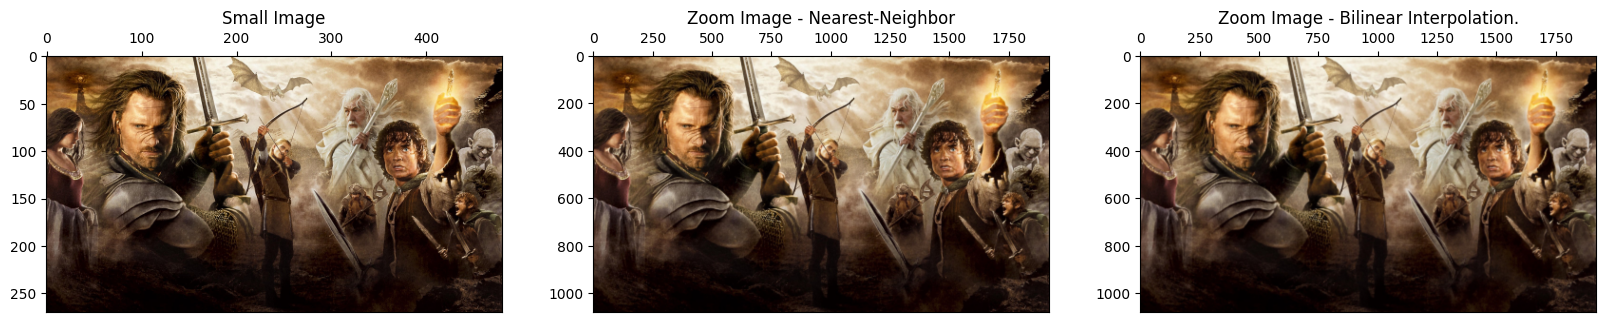

847701900.0

In [122]:
import cv2 
from matplotlib import pyplot as plt 
import numpy as np
im_small = cv2.imread('im01small.png', cv.IMREAD_COLOR) #read small image
im_small = cv.cvtColor(im_small, cv.COLOR_BGR2RGB)
im_large = cv2.imread('im01.png', cv.IMREAD_COLOR) #read large image
im_large = cv.cvtColor(im_large, cv.COLOR_BGR2RGB)

#zoom the image by giving factor s = 4
s = 4
zoom_NN = cv2.resize(im_small, None, interpolation=cv2.INTER_NEAREST , fx=s, fy=s) #nearest-neighbor
zoom_BI = cv2.resize(im_small, None, interpolation=cv2.INTER_LINEAR , fx=s, fy=s) #bilinear interpolation.

#show output
fig, ax = plt.subplots(1,3, figsize=(20,60))
ax[0].imshow(im_small, vmin=0, vmax=255)
ax[0].xaxis.tick_top()
ax[0].set_title("Small Image")
ax[1].imshow(zoom_NN, vmin=0, vmax=255)
ax[1].xaxis.tick_top()
ax[1].set_title("Zoom Image - Nearest-Neighbor")
ax[2].imshow(zoom_BI, vmin=0, vmax=255)
ax[2].xaxis.tick_top()
ax[2].set_title("Zoom Image - Bilinear Interpolation.")
plt.show()

#computing SSD
SSD =  np.sum((np.array(zoom_NN, dtype=np.float32) - np.array(im_large, dtype=np.float32))**2)
SSD

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('daisy.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)              # img.shape : (413, 620, 3)
mask = np.zeros(img.shape[:2],np.uint8)   # img.shape[:2] = (413, 620)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1,1,561,841)

# this modifies mask 
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

## set all definite background and probable background pixels to 0
# while definite foreground and probable foreground pixels are set
# to 1, then scale teh mask from the range [0, 1] to [0, 255]
mask0 = np.where((mask==2)|(mask==1),0,1).astype('uint8')
mask1 = np.where((mask==cv2.GC_FGD)|(mask==cv2.GC_PR_FGD),0,1).astype('uint8')
mask2 = np.where((mask==cv2.GC_BGD)|(mask==cv2.GC_PR_BGD),0,1).astype('uint8')

# adding additional dimension for rgb to the mask, by default it gets 1
# multiply it with input image to get the segmented image
img_seg = img*mask0[:,:,np.newaxis]
img_fgd = img*mask1[:,:,np.newaxis]
img_bck = img*mask2[:,:,np.newaxis]

plt.subplot(141),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img_seg)
plt.title('Seg'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img_fgd)
plt.title('Seg'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img_bck)
plt.title('Seg'), plt.xticks([]), plt.yticks([])
plt.show()